In [10]:
import os
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import ast
import pandas as pd

df = pd.read_csv("inputs/Time_Step_60_Sorted.csv")

In [12]:
# convert "string arrays" → real np.float32 arrays
df["actuals"] = df["actuals"].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))
df["predictions"] = df["predictions"].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

# sanity check
print(type(df["actuals"].iloc[0]), df["actuals"].iloc[0].shape)
print(df["actuals"].iloc[0][:10])  # first 10 values

<class 'numpy.ndarray'> (60,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


[[ 4.575951   4.5063205  4.5497136 ... 31.978487  31.987476  31.981007 ]
 [ 4.4831448  4.535641   4.61174   ... 31.950846  31.944506  31.968634 ]
 [ 4.361536   4.508977   4.6280265 ... 31.91556   31.939774  31.948706 ]
 ...
 [21.061579  21.197773  21.37799   ... 27.256216  27.256548  27.130884 ]
 [20.972769  21.217463  21.398865  ... 27.277012  27.151274  27.218103 ]
 [20.998482  21.243519  21.51183   ... 27.171478  27.238333  27.32106  ]]


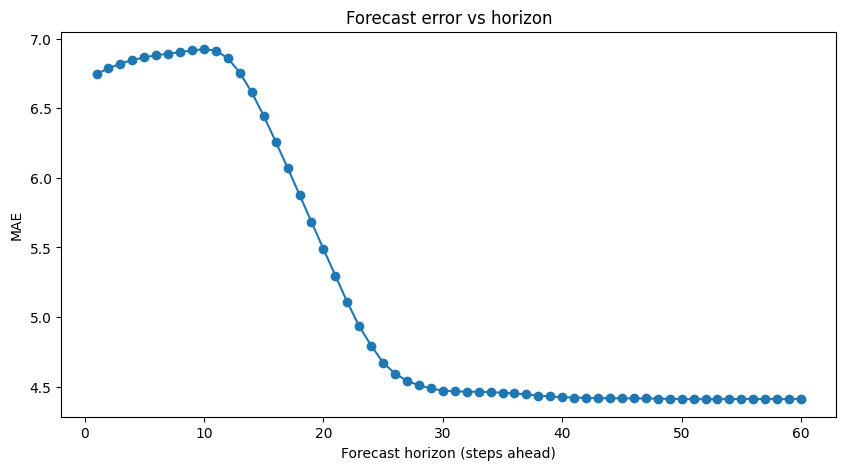

In [ ]:
# MAE over the prediction horizon
y_true = np.stack(df["actuals"].values)       # shape (n_windows, 60)
y_pred = np.stack(df["predictions"].values)   # shape (n_windows, 60)
# print(y_pred)
mae_per_horizon = np.mean(np.abs(y_true - y_pred), axis=0)

plt.figure(figsize=(10,5))
plt.plot(range(1, 61), mae_per_horizon, marker="o")
plt.xlabel("Forecast horizon (steps ahead)")
plt.ylabel("MAE")
plt.title("Forecast error vs horizon")
plt.show()


In [20]:
df['predictions'].shape(2)

TypeError: 'tuple' object is not callable